# Regresión logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import exp, log
from sklearn.metrics import confusion_matrix #pip install -U scikit-learn
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

# Ejemplo de regresión logística

In [2]:
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\PropedeuticoCienciaDeDatos\\Bases\\EjemploRegresionLogistica3D.csv",dtype='str',encoding = "ISO-8859-1")
M[["Y","X1","X2","X3"]] = M[["Y","X1","X2","X3"]].astype(float)
M.head()

,Y,X1,X2,X3
0,1.0,0.825929,0.936133,0.385233
1,0.0,0.023315,0.362509,0.900775
2,0.0,0.363650,0.405652,0.196377
3,0.0,0.911445,0.011728,0.516514
4,0.0,0.330563,0.141189,0.762634


# Estimación de coeficientes mediante descenso por gradiente

In [3]:
B = M[["X1","X2","X3"]].copy(deep=True).reset_index(drop=True)
B.head()

,X1,X2,X3
0,0.825929,0.936133,0.385233
1,0.023315,0.362509,0.900775
2,0.363650,0.405652,0.196377
3,0.911445,0.011728,0.516514
4,0.330563,0.141189,0.762634


In [4]:
B.iloc[1,:].tolist()
vx = [1]
vx.extend(B.iloc[1,:].tolist())
vx

[1, 0.023314995, 0.362508566, 0.900775099]

In [5]:
def PasoGradiente(w0,y,x,l):
    m = len(w0)
    n = len(y)
    vparcial = []
    for i in range(m):
        suma = 0
        for j in range(n):
            vx = [1]
            vx.extend(x.iloc[j,:].tolist())
            suma = suma + ( (1/(1+exp(-np.dot(w0,vx)))) - y[j] )*(vx[i])
        vparcial.extend([suma/n])
    w = []
    for i in range(m):
        w.extend([w0[i] - l*vparcial[i]])
    return w
#Ejemplo
y = M["Y"].tolist()
x = M[["X1","X2","X3"]].copy(deep=True).reset_index(drop=True)
w0 = [-4,2,2,2] 
l = 0.01
w = PasoGradiente(w0,y,x,l)
print(w)    

[-3.9991487619174664, 2.0008410289568244, 2.0008245808295677, 2.000601268282368]


In [6]:
#Función de costo
def FCosto(w,y,x):
    n = len(y)
    suma = 0
    for j in range(n):
        vx = [1]
        vx.extend(x.iloc[j,:].tolist())
        suma = suma + y[j]*log(1/(1+exp(-np.dot(w,vx)))) + (1-y[j])*log(1 - 1/(1+exp(-np.dot(w,vx))))
    suma = (-1/n)*suma
    return suma
#Ejemplo
y = M["Y"].tolist()
x = M[["X1","X2","X3"]].copy(deep=True).reset_index(drop=True)
w = [-4,3,3,3] 
C = FCosto(w,y,x)
print(C) 

0.3795631911471281


In [7]:
#Iteración de gradiente
N = 1000
y = M["Y"].tolist()
x = M[["X1","X2","X3"]].copy(deep=True).reset_index(drop=True)
l = 0.01
w0 = [-4,3,3,3] 
vC = []
for i in range(N):
    if i % 100 == 0:
        print(i,"->",end="")
    w = PasoGradiente(w0,y,x,l)
    vC.extend([FCosto(w,y,x)])
    w0 = w
print()
print(w)

0 ->100 ->200 ->300 ->400 ->500 ->600 ->700 ->800 ->900 ->
[-4.69479384273113, 2.9582829356828797, 2.9128661947873384, 2.784342720748337]


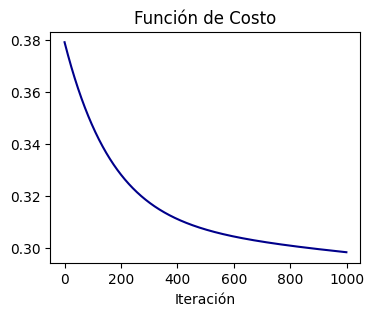

In [8]:
#Gráfica función de costo
fig = plt.figure(figsize=(4,3))
plt.title("Función de Costo")
plt.plot(range(len(vC)),vC,color="darkblue")
plt.xlabel('Iteración')
plt.show()

In [9]:
#Comparativo base
def Etiqueta(x):
    if x.Y_aprox_2 >= 0.5:
        resp = 1
    else:
        resp = 0
    return resp
B["Y_aprox_1"] = w[0] + w[1]*B["X1"] + w[2]*B["X2"] + w[3]*B["X3"]
B["Y_aprox_2"] = 1/(1+np.exp(-B["Y_aprox_1"] ))
B["Y_aprox"] = B.apply(lambda x: Etiqueta(x),axis=1)
B.head()

,X1,X2,X3,Y_aprox_1,Y_aprox_2,Y_aprox
0,0.825929,0.936133,0.385233,1.547990,0.824623,1
1,0.023315,0.362509,0.900775,-1.061816,0.256963,0
2,0.363650,0.405652,0.196377,-1.890623,0.131173,0
3,0.911445,0.011728,0.516514,-0.526167,0.371411,0
4,0.330563,0.141189,0.762634,-1.182198,0.234657,0


In [10]:
print(B["Y_aprox"].tolist())

[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [11]:
np.array(M["Y"].tolist())

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [12]:
#Determinación del error
y_real = np.array(M["Y"].tolist())
y_aprox = B["Y_aprox"].tolist()
n = len(y_real)
Error = 0
for i in range(n):
    if y_real[i] != y_aprox[i]:
        Error = Error + 1
print("El número de errores es igual a",Error)

El número de errores es igual a 4


# Regresión logística mediante librería de Python

In [13]:
#Regresión logística
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(M[["X1","X2","X3"]], M[["Y"]])
LR.predict(M[["X1","X2","X3"]])

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
print(LR.coef_)
print(LR.intercept_)

[[2.87260097 2.72810274 2.05458717]]
[-4.37618965]


In [15]:
M["Y_aprox_1"] = LR.intercept_[0] + LR.coef_[0][0]*M["X1"] + LR.coef_[0][1]*M["X2"] + LR.coef_[0][2]*M["X3"]
M["Y_aprox_2"] = 1/(1+np.exp(-M["Y_aprox_1"] ))
M.head()

,Y,X1,X2,X3,Y_aprox_1,Y_aprox_2
0,1.0,0.825929,0.936133,0.385233,1.341737,0.792776
1,0.0,0.023315,0.362509,0.900775,-1.469533,0.187014
2,0.0,0.363650,0.405652,0.196377,-1.821434,0.139262
3,0.0,0.911445,0.011728,0.516514,-0.664753,0.339673
4,0.0,0.330563,0.141189,0.762634,-1.474540,0.186254


In [16]:
def Etiqueta(x):
    if x.Y_aprox_2 >= 0.5:
        resp = 1
    else:
        resp = 0
    return resp
M["Y_aprox"] = M.apply(lambda x: Etiqueta(x),axis=1)
M.head()

,Y,X1,X2,X3,Y_aprox_1,Y_aprox_2,Y_aprox
0,1.0,0.825929,0.936133,0.385233,1.341737,0.792776,1
1,0.0,0.023315,0.362509,0.900775,-1.469533,0.187014,0
2,0.0,0.363650,0.405652,0.196377,-1.821434,0.139262,0
3,0.0,0.911445,0.011728,0.516514,-0.664753,0.339673,0
4,0.0,0.330563,0.141189,0.762634,-1.474540,0.186254,0


In [17]:
print(M["Y_aprox"].tolist())

[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [18]:
y_pred = LR.predict(M[["X1","X2","X3"]])
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


In [19]:
np.array(M["Y"].tolist())

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [20]:
confusion_matrix(M["Y_aprox"], y_pred)

array([[73,  0],
       [ 0, 27]], dtype=int64)

In [21]:
confusion_matrix(M["Y"], y_pred)

array([[64,  0],
       [ 9, 27]], dtype=int64)

<Figure size 200x200 with 0 Axes>

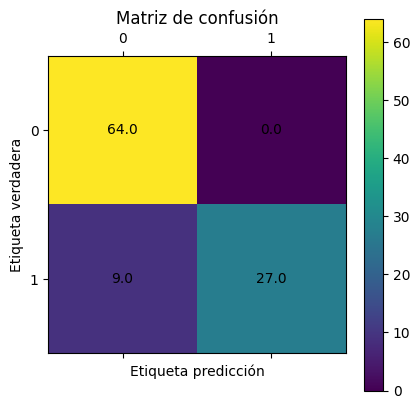

In [22]:
#Gráfica de matriz de confusión
fig = plt.figure(figsize=(2,2))
plt.matshow(confusion_matrix(M["Y"].tolist(), y_pred)) #https://matplotlib.org/stable/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py
plt.title('Matriz de confusión')
plt.colorbar()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicción')
for (i, j), z in np.ndenumerate(confusion_matrix(M["Y"].tolist(), y_pred)):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

# Ejercicio. Con base en el archivo "EjemploTarjetasBanco.csv" determine que tarjeta se le asinaría a una persona con una edad de 45 años, un salario de 35,000 pesos mensuales y una antigüedad en el banco de 4 años.

In [23]:
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\PropedeuticoCienciaDeDatos\\Bases\\EjemploTarjetasBanco.csv",dtype='str',encoding = "ISO-8859-1")
M.head(1)

,Y,Edad,Salario,Antiguedad
0,Platino,46,55354,14


In [24]:
M[["Edad","Salario","Antiguedad"]] = M[["Edad","Salario","Antiguedad"]].astype(float)

In [25]:
#Ajuste del modelo
LR = LogisticRegression()
LR.fit(M[["Edad","Salario","Antiguedad"]], M[["Y"]])
#LR.predict(M[["Edad","Salario","Antiguedad"]])

LogisticRegression()

In [26]:
y_est = LR.predict(np.asarray([[45,35000,4]]))
print("La tarjeta que se le asignará es",y_est[0])

La tarjeta que se le asignará es Platino
